In [170]:
# matplotlib 한글 출력 가능하도록 만들기
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.text as mpl_text

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# image url 읽기위해서
import urllib
from PIL import Image

# 데이터 분석 모듈
import pandas as pd
import numpy as np

import seaborn as sns

on_display = False

In [171]:
# chnage color
import matplotlib as mpl
COLOR = 'gray'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [172]:
# set pandas option
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 50)

In [173]:
# preprocessing
df_players = pd.read_csv("player_attack_for_simon.csv", index_col="선수명")
# df_players.drop("Unnamed:0",inplace=True)
df_players.drop(df_players.columns[0],axis=1,inplace=True)


In [174]:
df_players["신장"] = df_players["신장"].apply(lambda x: x.rstrip("cm")).astype("float")
df_players["체중"] = df_players["체중"].apply(lambda x: x.rstrip("kg")).astype("float")

In [175]:
df_players.loc["화이트", "신장"] = 180
df_players.loc["화이트", "체중"] = 102
# s.update(pd.Series(['d', 'e'], index=[0, 2]))

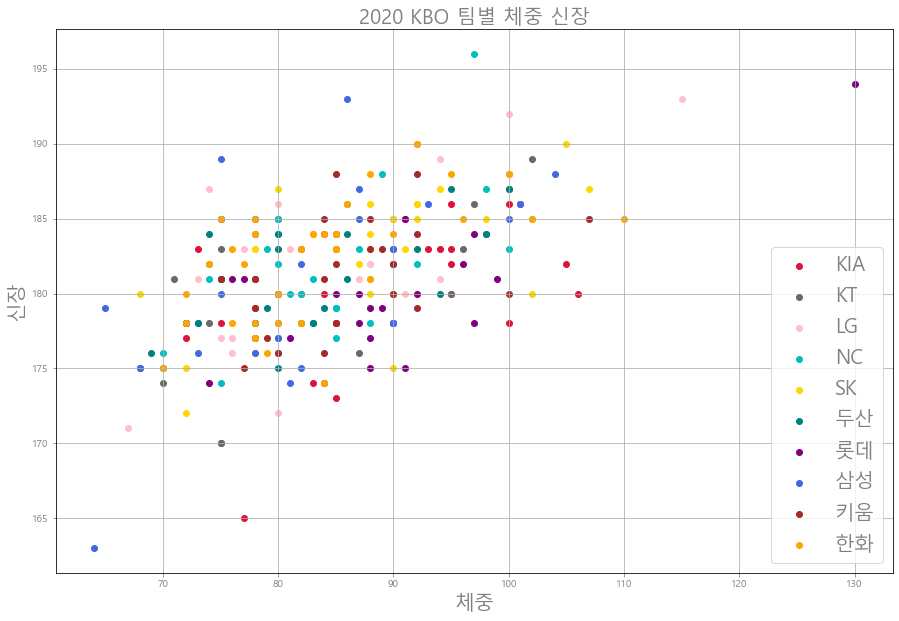

In [176]:
# Display Group by Team's Height with Weight
plt.figure(figsize=(15, 10))

plt.subplot(1, 1, 1)
team_groups = df_players.groupby("팀명")

colors = {'KIA':'crimson', '두산':'teal', '롯데':'purple', '삼성':'royalblue', '키움':'brown',
          '한화':'orange', 'KT':'dimgray', 'LG':'pink', 'NC':'c', 'SK':'gold'}

for name, group in team_groups:
    plt.scatter(group["체중"], group["신장"], label=name, c=colors[name])

# $$ 이거마우스 데면 되도록 해보기

label_fontsize= 20
plt.title("2020 KBO 팀별 체중 신장",fontsize=label_fontsize)
plt.xlabel("체중", fontsize=label_fontsize)
plt.ylabel("신장", fontsize=label_fontsize)
plt.legend(loc=4, prop={'size':20})
plt.grid()
plt.show()

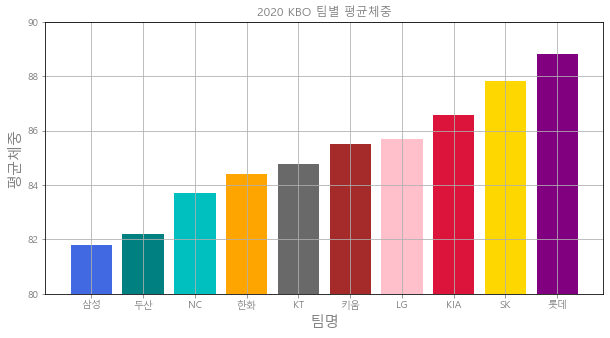

In [177]:
# Display Team by mean weight
plt.figure(figsize=(10, 5))

plt.subplot(1, 1, 1)
#['두산' '롯데' '삼성' '키움' '한화' 'KIA' 'KT' 'LG' 'NC' 'SK']

sort_mean_kg = team_groups["체중"].mean().sort_values()

bar_colors = [colors[x] for x in sort_mean_kg.index]
plt.bar(sort_mean_kg.index, sort_mean_kg, color=bar_colors)
plt.title("2020 KBO 팀별 평균체중")
plt.ylim(80, 90)
plt.xlabel("팀명", fontsize=15)
plt.ylabel("평균체중", fontsize=15)
plt.grid()
plt.show()

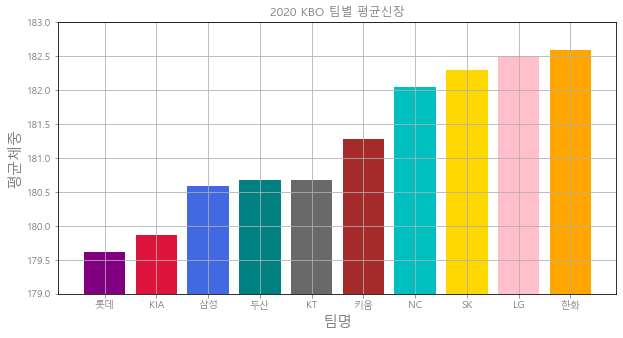

In [178]:
# Display Team by mean height
plt.figure(figsize=(10, 5))

plt.subplot(1, 1, 1)
#['두산' '롯데' '삼성' '키움' '한화' 'KIA' 'KT' 'LG' 'NC' 'SK']

sort_mean_kg = team_groups["신장"].mean().sort_values()

bar_colors = [colors[x] for x in sort_mean_kg.index]
plt.bar(sort_mean_kg.index, sort_mean_kg, color=bar_colors)
plt.title("2020 KBO 팀별 평균신장")
plt.ylim(179, 183)
plt.xlabel("팀명", fontsize=15)
plt.ylabel("평균체중", fontsize=15)
plt.grid()
plt.show()

In [179]:
def get_player_image_from_url(url, add_resize_val=0):
    # Load Image
    image = Image.open(urllib.request.urlopen(url))

    width, height = image.size
    img = image.resize((width + add_resize_val
                        , height + add_resize_val)
                        , Image.ANTIALIAS)
    return img

In [180]:
def display_player_img_graph(sort_df_data, y_lim_min, y_lim_max,
                             ax, pick_column ,top_num=15, add_text_pos_y = 0):
    top_data = sort_df_data.iloc[-top_num:, :]
    top_data.reset_index(inplace=True)

    ax.set_xlim(-1, top_num)
    ax.set_ylim(y_lim_min, y_lim_max)


    for idx, series in top_data.iterrows():
        # 참고사이트 : https://medium.com/@shaw.t/how-to-plot-image-and-text-on-matplotlib-91d7f23a3043

        # Insert Image
        img = get_player_image_from_url("http:" + top_data.loc[idx, "사진URL"]
                                        , add_resize_val=-30)
        ax.add_artist(
            AnnotationBbox(OffsetImage(img) ,(idx, series[pick_column]),frameon=True )
                    )
        # Insert Text
        ax.add_artist(
            mpl_text.Text( idx ,series[pick_column] + add_text_pos_y
                ,text= f"{top_num - idx}위_" + series["선수명"]
                ,color='black'  ,backgroundcolor="white"
                ,horizontalalignment='center' ,fontsize=10)
                    )

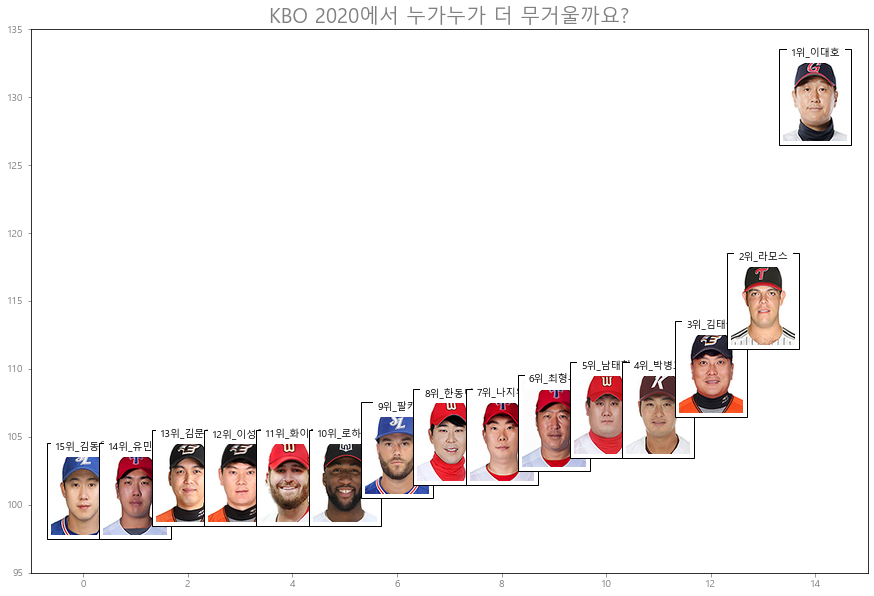

In [181]:
# Display weight Top
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

pick_colum_name = "체중"
sort_data = df_players[[pick_colum_name, "사진URL"]].\
            sort_values(by=pick_colum_name,ascending=True)

display_player_img_graph(sort_data, 95, 135, ax,
            top_num=15, add_text_pos_y=3, pick_column=pick_colum_name)

plt.title("KBO 2020에서 누가누가 더 무거울까요?",fontsize=20)
plt.show()

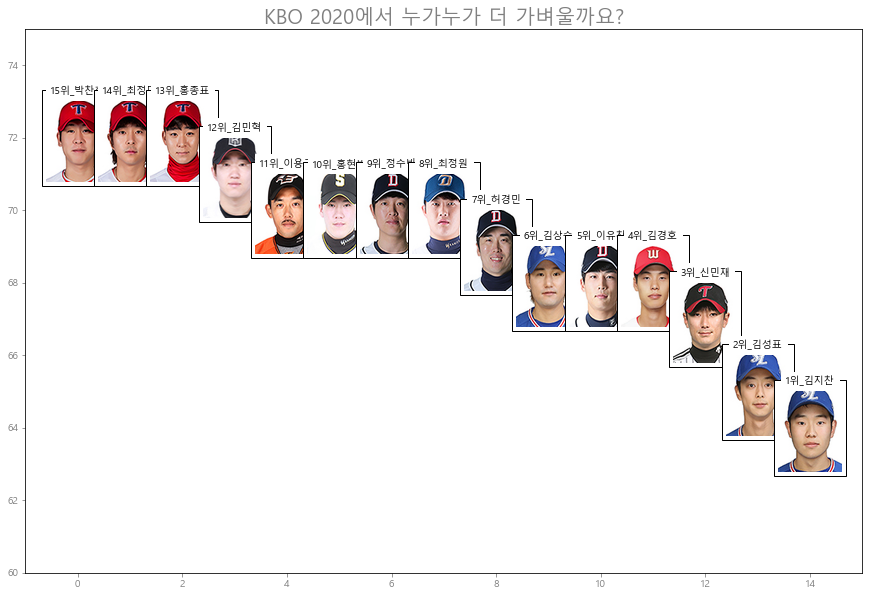

In [182]:
# Display low weight Top
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

pick_colum_name = "체중"
sort_data = df_players[[pick_colum_name, "사진URL"]].\
            sort_values(by=pick_colum_name,ascending=False)

display_player_img_graph(sort_data, 60, 75, ax,
            top_num=15, add_text_pos_y=1.2, pick_column=pick_colum_name)

plt.title("KBO 2020에서 누가누가 더 가벼울까요?",fontsize=20)
plt.show()

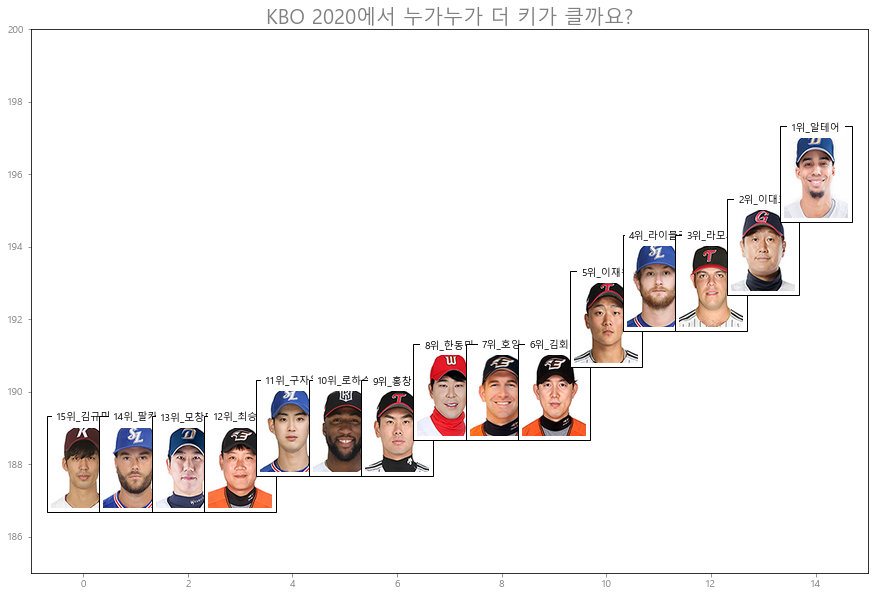

In [183]:
# Display height Top
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

pick_colum_name = "신장"
sort_data = df_players[[pick_colum_name, "사진URL"]].\
            sort_values(by=pick_colum_name,ascending=True)

display_player_img_graph(sort_data, 185, 200, ax,
            top_num=15, add_text_pos_y=1.2, pick_column=pick_colum_name)

plt.title("KBO 2020에서 누가누가 더 키가 클까요?",fontsize=20)
plt.show()

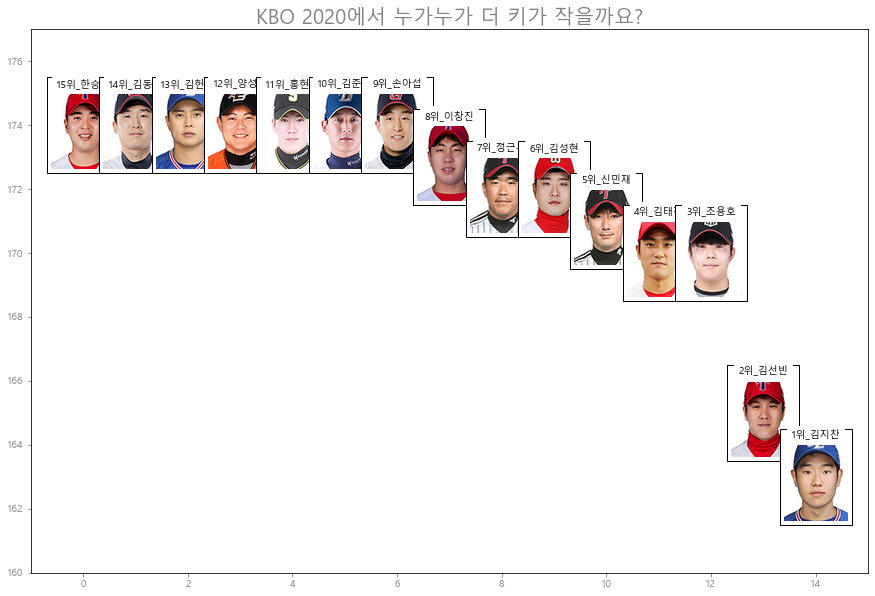

In [184]:
# Display low height Top
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

pick_colum_name = "신장"
sort_data = df_players[[pick_colum_name, "사진URL"]].\
            sort_values(by=pick_colum_name,ascending=False)

display_player_img_graph(sort_data, 160, 177, ax,
            top_num=15, add_text_pos_y=1.2, pick_column=pick_colum_name)

plt.title("KBO 2020에서 누가누가 더 키가 작을까요?",fontsize=20)
plt.show()

MultiIndex([('KIA', 'super_over_w'),
            ('KIA',     'normal_w'),
            ('KIA',       'over_w'),
            ( 'KT', 'super_over_w'),
            ( 'KT',       'over_w'),
            ( 'KT',     'normal_w'),
            ( 'LG', 'super_over_w'),
            ( 'LG',       'over_w'),
            ( 'LG',     'normal_w'),
            ( 'NC', 'super_over_w'),
            ( 'NC',       'over_w'),
            ( 'NC',     'normal_w'),
            ( 'SK', 'super_over_w'),
            ( 'SK',       'over_w'),
            ( 'SK',     'normal_w'),
            ( '두산', 'super_over_w'),
            ( '두산',     'normal_w'),
            ( '두산',       'over_w'),
            ( '롯데', 'super_over_w'),
            ( '롯데',       'over_w'),
            ( '삼성', 'super_over_w'),
            ( '삼성',       'over_w'),
            ( '삼성',     'normal_w'),
            ( '키움', 'super_over_w'),
            ( '키움',       'over_w'),
            ( '키움',     'normal_w'),
            ( '한화', 'super_over_w'),
 

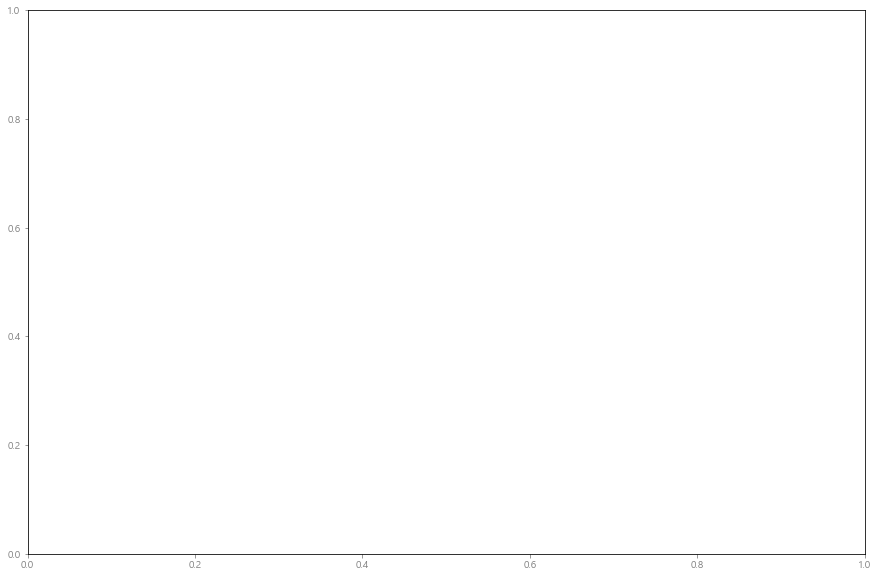

In [185]:
# BMI 지수 (비만도 지수)
# BMI지수= 몸무게(kg) ÷ (신장(m) × 신장(m))


# Display BMI value
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

# df_players.head()
fat_data = df_players[["신장","체중","팀명"]].reset_index()

def caculate_bmi(df):
    # BMI지수= 몸무게(kg) ÷ (신장(m) × 신장(m))
    cal_height = (df["신장"] * 0.01) ** 2
    return df["체중"] / cal_height

def judge_fat_level(series_bmi):
    # 산출된 값이 18.5 이하면 저체중,
    # 18.5~23은 정상,
    # 23~25는 과체중,
    # 25~30은 비만,
    # 30이상은 고도비만으로 나누어진다.
    if series_bmi < 18.5:
        return "low_w"
    elif series_bmi < 23:
        return "normal_w"
    elif series_bmi < 25:
        return "over_w"
    else:
        return "super_over_w"

fat_data["BMI"] = fat_data.apply(caculate_bmi, axis=1)
fat_data["BMI_LEVEL"] = fat_data["BMI"].apply(judge_fat_level)


bmi_data = fat_data[["팀명", "BMI_LEVEL"]]
# bmi_data.value_counts()
team_bmi_count = bmi_data.groupby("팀명")["BMI_LEVEL"].value_counts()

team_bmi_count.index



#
# p1 = plt.bar(fat_data["팀명"],fat_data["BMI_LEVEL"] )
#
# plt.show()
#df_players["체중"] = df_players["체중"].apply(lambda x: x.rstrip("kg")).astype("float")

In [186]:
# ------------------ 과연 체중과 키가 타율 장타율에 미치는 영향이 있을까?

## 팀별 신장
## 먼저 가장 몸무게가 나가는사람 적게나가는사람 표시
## 키가 가장큰사람 적은사람

# 레전드에 이미지 넣기 있으면 키인지 무게인지 넣어주기.

# 비만도 측정

# 몸무게 혹은 키 혹은 비만도에 따라서 장타율은 얼마나 나오는지 표시
# 도루율 표시